In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'mae-main'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['CODE_OF_CONDUCT.md', 'main_linprobe.py', 'submitit_linprobe.py', 'engine_pretrain.py', 'main_pretrain.py', 'CONTRIBUTING.md', 'submitit_finetune.py', 'submitit_pretrain.py', 'FINETUNE.md', 'LICENSE', 'engine_finetune.py', 'README.md', 'PRETRAIN.md', 'main_finetune.py', 'temp.ipynb', 'Progress-Objects-Sample.tar.gz', 'Progress-Objects-Sample', 'rob599', 'util', 'temp', '.ipynb_checkpoints', 'demo', '__pycache__', 'models_vit.py', 'models_mae.py', 'output_dir', 'train', 'project.ipynb']


In [4]:
%cd drive/MyDrive/mae-main/

/content/drive/MyDrive/mae-main


In [5]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

import time, os
os.environ["TZ"] = "US/Eastern"
time.tzset()
import requests
import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

# check whether run in Colab
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install timm==0.4.5  # 0.3.2 does not work in Colab
else:
    sys.path.append('..')
import models_mae

Running in Colab.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 6.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1

In [8]:
import statistics
import random
import models_mae
%matplotlib inline


plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [9]:
if torch.cuda.is_available:
  print('Good to go!')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

Good to go!


In [10]:
import rob599

# Invoke the above function to get our data.
rob599.reset_seed(0)
x_train, y_train, x_test, y_test = rob599.data.progress_objects(x_dtype=torch.float64)

In [11]:
X_train = x_train.cuda()
y_train = y_train.cuda()
X_test = x_test.cuda()
y_test = y_test.cuda()

In [ ]:
mean = torch.mean(X_train, dim=[0, 2, 3])  # 在批次、高度和宽度上计算每个通道的均值
std = torch.std(X_train, dim=[0, 2, 3])   # 在批次、高度和宽度上计算每个通道的标准差

print("Mean of each channel:", mean)
print("Standard deviation of each channel:", std)

Mean of each channel: tensor([0.4703, 0.4036, 0.3561], device='cuda:0', dtype=torch.float64)
Standard deviation of each channel: tensor([0.1796, 0.2076, 0.2056], device='cuda:0', dtype=torch.float64)


In [ ]:
from torchvision.utils import save_image
from torchvision import transforms
classes = [
        "master_chef_can",
				"cracker_box",
				"sugar_box",
				"tomato_soup_can",
				"mustard_bottle",
				"tuna_fish_can",
				"gelatin_box",
				"potted_meat_can",
				"mug",
				"large_marker"
		    ]
root_dir = './train'
for cls in classes:
    os.makedirs(os.path.join(root_dir, cls), exist_ok=True)

In [ ]:
for idx, (image, label) in enumerate(zip(X_train, y_train)):
    print(idx)
    file_path = os.path.join(root_dir, classes[label.item()], f'image_{idx}.png')
    save_image(image, file_path)
print("All images have been saved.")

Streaming output truncated to the last 5000 lines.
[17:11:54.548973] 45001
[17:11:54.553643] 45002
[17:11:54.558187] 45003
[17:11:54.562874] 45004
[17:11:54.567332] 45005
[17:11:54.571890] 45006
[17:11:54.576713] 45007
[17:11:54.599825] 45008
[17:11:54.605580] 45009
[17:11:54.611200] 45010
[17:11:54.616055] 45011
[17:11:54.620985] 45012
[17:11:54.625371] 45013
[17:11:54.630118] 45014
[17:11:54.635024] 45015
[17:11:54.639609] 45016
[17:11:54.643949] 45017
[17:11:54.648759] 45018
[17:11:54.655225] 45019
[17:11:54.660970] 45020
[17:11:54.684267] 45021
[17:11:54.690338] 45022
[17:11:54.695343] 45023
[17:11:54.700282] 45024
[17:11:54.704826] 45025
[17:11:54.709366] 45026
[17:11:54.713670] 45027
[17:11:54.717973] 45028
[17:11:54.722490] 45029
[17:11:54.727083] 45030
[17:11:54.731708] 45031
[17:11:54.735995] 45032
[17:11:54.758683] 45033
[17:11:54.763269] 45034
[17:11:54.767749] 45035
[17:11:54.772274] 45036
[17:11:54.776957] 45037
[17:11:54.781589] 45038
[17:11:54.785809] 45039
[17:11:54.790

In [ ]:
import argparse
import datetime
import json
import numpy as np
import os
import time
from pathlib import Path

import torch
import torch.backends.cudnn as cudnn
from torch.utils.tensorboard import SummaryWriter
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import timm
import timm.optim.optim_factory as optim_factory

import util.misc as misc
from util.misc import NativeScalerWithGradNormCount as NativeScaler

import models_mae

from engine_pretrain import train_one_epoch

In [ ]:
def get_args_parser():
    parser = argparse.ArgumentParser('MAE pre-training', add_help=False)
    parser.add_argument('--batch_size', default=64, type=int,
                        help='Batch size per GPU (effective batch size is batch_size * accum_iter * # gpus')
    parser.add_argument('--epochs', default=30, type=int)
    parser.add_argument('--accum_iter', default=1, type=int,
                        help='Accumulate gradient iterations (for increasing the effective batch size under memory constraints)')

    # Model parameters
    parser.add_argument('--model', default='mae_vit_large_patch16', type=str, metavar='MODEL',
                        help='Name of model to train')

    parser.add_argument('--input_size', default=32, type=int,
                        help='images input size')

    parser.add_argument('--mask_ratio', default=0.75, type=float,
                        help='Masking ratio (percentage of removed patches).')

    parser.add_argument('--norm_pix_loss', action='store_true',
                        help='Use (per-patch) normalized pixels as targets for computing loss')
    parser.set_defaults(norm_pix_loss=False)

    # Optimizer parameters
    parser.add_argument('--weight_decay', type=float, default=0.05,
                        help='weight decay (default: 0.05)')

    parser.add_argument('--lr', type=float, default=None, metavar='LR',
                        help='learning rate (absolute lr)')
    parser.add_argument('--blr', type=float, default=1e-3, metavar='LR',
                        help='base learning rate: absolute_lr = base_lr * total_batch_size / 256')
    parser.add_argument('--min_lr', type=float, default=0., metavar='LR',
                        help='lower lr bound for cyclic schedulers that hit 0')

    parser.add_argument('--warmup_epochs', type=int, default=40, metavar='N',
                        help='epochs to warmup LR')

    # Dataset parameters
    parser.add_argument('--data_path', default='./train/', type=str,
                        help='dataset path')
    parser.add_argument('--output_dir', default='./output_dir',
                        help='path where to save, empty for no saving')
    parser.add_argument('--log_dir', default='./output_dir',
                        help='path where to tensorboard log')
    parser.add_argument('--device', default='cuda',
                        help='device to use for training / testing')
    parser.add_argument('--seed', default=0, type=int)
    parser.add_argument('--resume', default='',
                        help='resume from checkpoint')

    parser.add_argument('--start_epoch', default=0, type=int, metavar='N',
                        help='start epoch')
    parser.add_argument('--num_workers', default=10, type=int)
    parser.add_argument('--pin_mem', action='store_true',
                        help='Pin CPU memory in DataLoader for more efficient (sometimes) transfer to GPU.')
    parser.add_argument('--no_pin_mem', action='store_false', dest='pin_mem')
    parser.set_defaults(pin_mem=True)

    # distributed training parameters
    parser.add_argument('--world_size', default=1, type=int,
                        help='number of distributed processes')
    parser.add_argument('--local_rank', default=-1, type=int)
    parser.add_argument('--dist_on_itp', action='store_true')
    parser.add_argument('--dist_url', default='env://',
                        help='url used to set up distributed training')

    return parser

In [ ]:
from torch.utils.data import DataLoader
def main(args):
    misc.init_distributed_mode(args)

    device = torch.device(args.device)

    # fix the seed for reproducibility
    seed = args.seed + misc.get_rank()
    torch.manual_seed(seed)
    np.random.seed(seed)

    cudnn.benchmark = True
    '''
    transform_basic = transforms.Compose([transforms.ToTensor()])

    dataset = datasets.ImageFolder(args.data_path, transform=transform_basic)
    loader = DataLoader(dataset, batch_size=64, shuffle=False)

    # 计算均值和标准差
    def get_mean_and_std(loader):
        channels_sum, channels_squared_sum, num_batches = 0, 0, 0
        for data, _ in loader:
            channels_sum += torch.mean(data, dim=[0, 2, 3])
            channels_squared_sum += torch.mean(data ** 2, dim=[0, 2, 3])
            num_batches += 1
        mean = channels_sum / num_batches
        std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5
        return mean, std

    mean, std = get_mean_and_std(loader)
    print(f'Mean: {mean}, Std: {std}')
    '''
    # simple augmentation
    transform_train = transforms.Compose([
            transforms.RandomResizedCrop(args.input_size, scale=(0.2, 1.0), interpolation=3),  # 3 is bicubic
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.4703, 0.4036, 0.3561], std=[0.1796, 0.2076, 0.2056])])
    dataset_train = datasets.ImageFolder(args.data_path, transform=transform_train)
    print(dataset_train)

    if True:  # args.distributed:
        num_tasks = misc.get_world_size()
        global_rank = misc.get_rank()
        sampler_train = torch.utils.data.DistributedSampler(
            dataset_train, num_replicas=num_tasks, rank=global_rank, shuffle=True
        )
        print("Sampler_train = %s" % str(sampler_train))
    else:
        sampler_train = torch.utils.data.RandomSampler(dataset_train)

    if global_rank == 0 and args.log_dir is not None:
        os.makedirs(args.log_dir, exist_ok=True)
        log_writer = SummaryWriter(log_dir=args.log_dir)
    else:
        log_writer = None

    data_loader_train = torch.utils.data.DataLoader(
        dataset_train, sampler=sampler_train,
        batch_size=args.batch_size,
        num_workers=args.num_workers,
        pin_memory=args.pin_mem,
        drop_last=True,
    )

    # define the model
    model = models_mae.__dict__[args.model](norm_pix_loss=args.norm_pix_loss)

    model.to(device)

    model_without_ddp = model
    print("Model = %s" % str(model_without_ddp))

    eff_batch_size = args.batch_size * args.accum_iter * misc.get_world_size()

    if args.lr is None:  # only base_lr is specified
        args.lr = args.blr * eff_batch_size / 256

    print("base lr: %.2e" % (args.lr * 256 / eff_batch_size))
    print("actual lr: %.2e" % args.lr)

    print("accumulate grad iterations: %d" % args.accum_iter)
    print("effective batch size: %d" % eff_batch_size)

    if args.distributed:
        model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[args.gpu], find_unused_parameters=True)
        model_without_ddp = model.module

    # following timm: set wd as 0 for bias and norm layers
    param_groups = optim_factory.add_weight_decay(model_without_ddp, args.weight_decay)
    optimizer = torch.optim.AdamW(param_groups, lr=args.lr, betas=(0.9, 0.95))
    print(optimizer)
    loss_scaler = NativeScaler()

    misc.load_model(args=args, model_without_ddp=model_without_ddp, optimizer=optimizer, loss_scaler=loss_scaler)

    print(f"Start training for {args.epochs} epochs")
    start_time = time.time()
    for epoch in range(args.start_epoch, args.epochs):
        if args.distributed:
            data_loader_train.sampler.set_epoch(epoch)
        train_stats = train_one_epoch(
            model, data_loader_train,
            optimizer, device, epoch, loss_scaler,
            log_writer=log_writer,
            args=args
        )
        if args.output_dir and (epoch % 10 == 0 or epoch + 1 == args.epochs):
            misc.save_model(
                args=args, model=model, model_without_ddp=model_without_ddp, optimizer=optimizer,
                loss_scaler=loss_scaler, epoch=epoch)

        log_stats = {**{f'train_{k}': v for k, v in train_stats.items()},
                        'epoch': epoch,}

        if args.output_dir and misc.is_main_process():
            if log_writer is not None:
                log_writer.flush()
            with open(os.path.join(args.output_dir, "log.txt"), mode="a", encoding="utf-8") as f:
                f.write(json.dumps(log_stats) + "\n")

    total_time = time.time() - start_time
    total_time_str = str(datetime.timedelta(seconds=int(total_time)))
    print('Training time {}'.format(total_time_str))

In [ ]:
if __name__ == '__main__':
    args = get_args_parser()
    args = args.parse_args(args=[])
    if args.output_dir:
        Path(args.output_dir).mkdir(parents=True, exist_ok=True)
    main(args)


[17:50:25.038492] Not using distributed mode
[17:50:27.181588] [17:50:27.181560] [17:50:27.181721] Dataset ImageFolder
    Number of datapoints: 50000
    Root location: ./train/
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(32, 32), scale=(0.2, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.4703, 0.4036, 0.3561], std=[0.1796, 0.2076, 0.2056])
           )
[17:50:27.181959] [17:50:27.181951] [17:50:27.182006] Sampler_train = <torch.utils.data.distributed.DistributedSampler object at 0x7e31fd6a7340>


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[17:50:32.398618] [17:50:32.398598] [17:50:32.398737] Model = MaskedAutoencoderViT(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 1024, kernel_size=(4, 4), stride=(4, 4))
  )
  (blocks): ModuleList(
    (0-23): 24 x Block(
      (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=1024, out_features=3072, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=1024, out_features=1024, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=1024, out_features=4096, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[17:50:36.141324] [17:50:36.141284] [17:50:36.142793] Epoch: [0]  [  0/781]  eta: 0:48:29  lr: 0.000000  loss: 2.8107 (2.8107)  time: 3.7247  data: 1.4999  max mem: 7706
[17:50:39.001444] [17:50:39.001425] [17:50:39.002383] Epoch: [0]  [ 20/781]  eta: 0:03:58  lr: 0.000000  loss: 2.6614 (2.6690)  time: 0.1429  data: 0.0003  max mem: 10225
[17:51:30.801692] [17:51:30.801674] [17:51:30.801816] Epoch: [0]  [ 40/781]  eta: 0:17:35  lr: 0.000000  loss: 2.0846 (2.3895)  time: 2.5899  data: 2.4293  max mem: 10225
[17:51:33.959217] [17:51:33.959197] [17:51:33.960373] Epoch: [0]  [ 60/781]  eta: 0:12:07  lr: 0.000000  loss: 1.4227 (2.0848)  time: 0.1578  data: 0.0003  max mem: 10225
[17:51:37.088861] [17:51:37.088836] [17:51:37.089039] Epoch: [0]  [ 80/781]  eta: 0:09:19  lr: 0.000001  loss: 1.0702 (1.8406)  time: 0.1563  data: 0.0002  max mem: 10225
[17:51:40.227231] [17:51:40.227213] [17:51:40.228114] Epoch: [0]  [100/781]  eta: 0:07:37  lr: 0.000001  loss: 0.9832 (1.6710)  time: 0.1568  data

In [ ]:

imagenet_mean = np.array([0.4703, 0.4036, 0.3561])
imagenet_std = np.array([0.1796, 0.2076, 0.2056])

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(models_mae, arch)()
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

def run_one_image(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()
    print(f'MAE loss: {loss.item():.4f}')
    # visualize the mask
    mask = mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()

    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")

    plt.show()

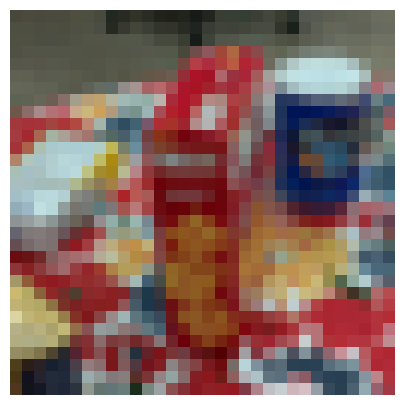

In [ ]:
img = Image.open('./train/cracker_box/image_54.png')
img = np.array(img) / 255.

assert img.shape == (32, 32, 3)

# normalize by ImageNet mean and std
img = img - imagenet_mean
img = img / imagenet_std

plt.rcParams['figure.figsize'] = [5, 5]
show_image(torch.tensor(img))

In [ ]:
chkpt_dir = '/content/drive/MyDrive/mae-main/output_dir/checkpoint-29.pth'
model_mae = prepare_model(chkpt_dir, 'mae_vit_large_patch16')
print('Model loaded.')

[04:52:48.696939] <All keys matched successfully>
[04:52:48.936271] Model loaded.


[04:57:29.042166] MAE with pixel reconstruction:
[04:57:29.163700] MAE loss: 0.6521


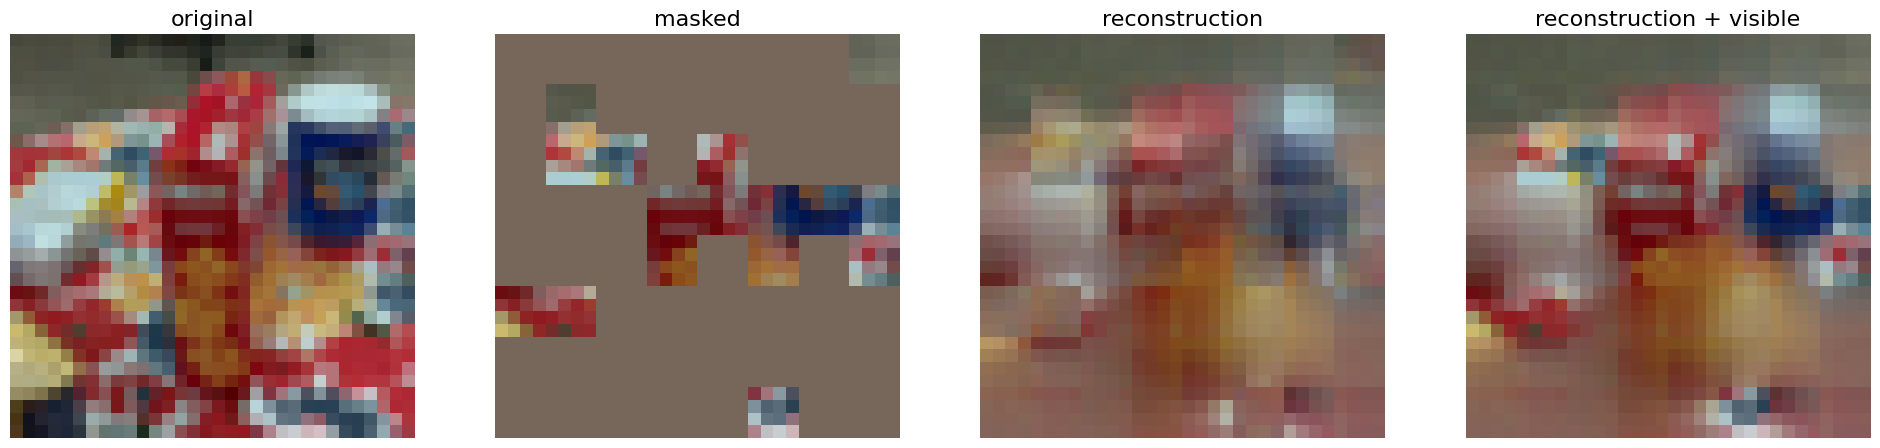

In [ ]:
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
run_one_image(img, model_mae)

In [12]:
classes = [
        "master_chef_can",
				"cracker_box",
				"sugar_box",
				"tomato_soup_can",
				"mustard_bottle",
				"tuna_fish_can",
				"gelatin_box",
				"potted_meat_can",
				"mug",
				"large_marker"
		    ]
root_dir = './val'
for cls in classes:
    os.makedirs(os.path.join(root_dir, cls), exist_ok=True)


In [14]:
from torchvision.utils import save_image
from torchvision import transforms
for idx, (image, label) in enumerate(zip(X_test, y_test)):
    print(idx)
    file_path = os.path.join(root_dir, classes[label.item()], f'image_{idx}.png')
    save_image(image, file_path)
print("All images have been saved.")

流式输出内容被截断，只能显示最后 5000 行内容。
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
519

In [18]:
def get_args_parser():
    parser = argparse.ArgumentParser('MAE fine-tuning for image classification', add_help=False)
    parser.add_argument('--batch_size', default=64, type=int,
                        help='Batch size per GPU (effective batch size is batch_size * accum_iter * # gpus')
    parser.add_argument('--epochs', default=30, type=int)
    parser.add_argument('--accum_iter', default=1, type=int,
                        help='Accumulate gradient iterations (for increasing the effective batch size under memory constraints)')

    # Model parameters
    parser.add_argument('--model', default='vit_large_patch16', type=str, metavar='MODEL',
                        help='Name of model to train')

    parser.add_argument('--input_size', default=32, type=int,
                        help='images input size')

    parser.add_argument('--drop_path', type=float, default=0.1, metavar='PCT',
                        help='Drop path rate (default: 0.1)')

    # Optimizer parameters
    parser.add_argument('--clip_grad', type=float, default=None, metavar='NORM',
                        help='Clip gradient norm (default: None, no clipping)')
    parser.add_argument('--weight_decay', type=float, default=0.05,
                        help='weight decay (default: 0.05)')

    parser.add_argument('--lr', type=float, default=None, metavar='LR',
                        help='learning rate (absolute lr)')
    parser.add_argument('--blr', type=float, default=1e-3, metavar='LR',
                        help='base learning rate: absolute_lr = base_lr * total_batch_size / 256')
    parser.add_argument('--layer_decay', type=float, default=0.75,
                        help='layer-wise lr decay from ELECTRA/BEiT')

    parser.add_argument('--min_lr', type=float, default=1e-6, metavar='LR',
                        help='lower lr bound for cyclic schedulers that hit 0')

    parser.add_argument('--warmup_epochs', type=int, default=5, metavar='N',
                        help='epochs to warmup LR')

    # Augmentation parameters
    parser.add_argument('--color_jitter', type=float, default=None, metavar='PCT',
                        help='Color jitter factor (enabled only when not using Auto/RandAug)')
    parser.add_argument('--aa', type=str, default='rand-m9-mstd0.5-inc1', metavar='NAME',
                        help='Use AutoAugment policy. "v0" or "original". " + "(default: rand-m9-mstd0.5-inc1)'),
    parser.add_argument('--smoothing', type=float, default=0.1,
                        help='Label smoothing (default: 0.1)')

    # * Random Erase params
    parser.add_argument('--reprob', type=float, default=0.25, metavar='PCT',
                        help='Random erase prob (default: 0.25)')
    parser.add_argument('--remode', type=str, default='pixel',
                        help='Random erase mode (default: "pixel")')
    parser.add_argument('--recount', type=int, default=1,
                        help='Random erase count (default: 1)')
    parser.add_argument('--resplit', action='store_true', default=False,
                        help='Do not random erase first (clean) augmentation split')

    # * Mixup params
    parser.add_argument('--mixup', type=float, default=0,
                        help='mixup alpha, mixup enabled if > 0.')
    parser.add_argument('--cutmix', type=float, default=0,
                        help='cutmix alpha, cutmix enabled if > 0.')
    parser.add_argument('--cutmix_minmax', type=float, nargs='+', default=None,
                        help='cutmix min/max ratio, overrides alpha and enables cutmix if set (default: None)')
    parser.add_argument('--mixup_prob', type=float, default=1.0,
                        help='Probability of performing mixup or cutmix when either/both is enabled')
    parser.add_argument('--mixup_switch_prob', type=float, default=0.5,
                        help='Probability of switching to cutmix when both mixup and cutmix enabled')
    parser.add_argument('--mixup_mode', type=str, default='batch',
                        help='How to apply mixup/cutmix params. Per "batch", "pair", or "elem"')

    # * Finetuning params
    parser.add_argument('--finetune', default= '/content/drive/MyDrive/result/GanPatchSize4-29.pth',
                        help='finetune from checkpoint')
    parser.add_argument('--global_pool', action='store_true')
    parser.set_defaults(global_pool=False)
    parser.add_argument('--cls_token', action='store_false', dest='global_pool',
                        help='Use class token instead of global pool for classification')

    # Dataset parameters
    parser.add_argument('--data_path', default='./', type=str,
                        help='dataset path')
    parser.add_argument('--nb_classes', default=10, type=int,
                        help='number of the classification types')

    parser.add_argument('--output_dir', default='./finetune_output_dir',
                        help='path where to save, empty for no saving')
    parser.add_argument('--log_dir', default='./finetune_output_dir',
                        help='path where to tensorboard log')
    parser.add_argument('--device', default='cuda',
                        help='device to use for training / testing')
    parser.add_argument('--seed', default=0, type=int)
    parser.add_argument('--resume', default=False,
                        help='resume from checkpoint')

    parser.add_argument('--start_epoch', default=0, type=int, metavar='N',
                        help='start epoch')
    parser.add_argument('--eval', action='store_true',default=False,
                        help='Perform evaluation only')
    parser.add_argument('--dist_eval', action='store_true', default=False,
                        help='Enabling distributed evaluation (recommended during training for faster monitor')
    parser.add_argument('--num_workers', default=10, type=int)
    parser.add_argument('--pin_mem', action='store_true',
                        help='Pin CPU memory in DataLoader for more efficient (sometimes) transfer to GPU.')
    parser.add_argument('--no_pin_mem', action='store_false', dest='pin_mem')
    parser.set_defaults(pin_mem=True)

    # distributed training parameters
    parser.add_argument('--world_size', default=1, type=int,
                        help='number of distributed processes')
    parser.add_argument('--local_rank', default=-1, type=int)
    parser.add_argument('--dist_on_itp', action='store_true')
    parser.add_argument('--dist_url', default='env://',
                        help='url used to set up distributed training')

    return parser

In [19]:
import argparse
import datetime
import json
import numpy as np
import os
import time
from pathlib import Path

import torch
import torch.backends.cudnn as cudnn
from torch.utils.tensorboard import SummaryWriter

from timm.models.layers import trunc_normal_
from timm.data.mixup import Mixup
from timm.loss import LabelSmoothingCrossEntropy, SoftTargetCrossEntropy

import util.lr_decay as lrd
import util.misc as misc
from util.datasets import build_dataset
from util.pos_embed import interpolate_pos_embed
from util.misc import NativeScalerWithGradNormCount as NativeScaler

import models_vit

from engine_finetune import train_one_epoch, evaluate
def evaluation(args):
    misc.init_distributed_mode(args)


    device = torch.device(args.device)

    # fix the seed for reproducibility
    seed = args.seed + misc.get_rank()
    torch.manual_seed(seed)
    np.random.seed(seed)

    cudnn.benchmark = True

    dataset_train = build_dataset(is_train=True, args=args)
    dataset_val = build_dataset(is_train=False, args=args)

    if True:  # args.distributed:
        num_tasks = misc.get_world_size()
        global_rank = misc.get_rank()
        sampler_train = torch.utils.data.DistributedSampler(
            dataset_train, num_replicas=num_tasks, rank=global_rank, shuffle=True
        )
        print("Sampler_train = %s" % str(sampler_train))
        if args.dist_eval:
            if len(dataset_val) % num_tasks != 0:
                print('Warning: Enabling distributed evaluation with an eval dataset not divisible by process number. '
                      'This will slightly alter validation results as extra duplicate entries are added to achieve '
                      'equal num of samples per-process.')
            sampler_val = torch.utils.data.DistributedSampler(
                dataset_val, num_replicas=num_tasks, rank=global_rank, shuffle=True)  # shuffle=True to reduce monitor bias
        else:
            sampler_val = torch.utils.data.SequentialSampler(dataset_val)
    else:
        sampler_train = torch.utils.data.RandomSampler(dataset_train)
        sampler_val = torch.utils.data.SequentialSampler(dataset_val)

    if global_rank == 0 and args.log_dir is not None and not args.eval:
        os.makedirs(args.log_dir, exist_ok=True)
        log_writer = SummaryWriter(log_dir=args.log_dir)
    else:
        log_writer = None

    data_loader_train = torch.utils.data.DataLoader(
        dataset_train, sampler=sampler_train,
        batch_size=args.batch_size,
        num_workers=args.num_workers,
        pin_memory=args.pin_mem,
        drop_last=True,
    )

    data_loader_val = torch.utils.data.DataLoader(
        dataset_val, sampler=sampler_val,
        batch_size=args.batch_size,
        num_workers=args.num_workers,
        pin_memory=args.pin_mem,
        drop_last=False
    )

    mixup_fn = None
    mixup_active = args.mixup > 0 or args.cutmix > 0. or args.cutmix_minmax is not None
    if mixup_active:
        print("Mixup is activated!")
        mixup_fn = Mixup(
            mixup_alpha=args.mixup, cutmix_alpha=args.cutmix, cutmix_minmax=args.cutmix_minmax,
            prob=args.mixup_prob, switch_prob=args.mixup_switch_prob, mode=args.mixup_mode,
            label_smoothing=args.smoothing, num_classes=args.nb_classes)

    model = models_vit.__dict__[args.model](
        num_classes=args.nb_classes,
        drop_path_rate=args.drop_path,
        global_pool=args.global_pool,
    )

    if args.finetune and not args.eval:
        checkpoint = torch.load(args.finetune, map_location='cuda')

        print("Load pre-trained checkpoint from: %s" % args.finetune)
        checkpoint_model = checkpoint['model']
        state_dict = model.state_dict()
        for k in ['head.weight', 'head.bias']:
            if k in checkpoint_model and checkpoint_model[k].shape != state_dict[k].shape:
                print(f"Removing key {k} from pretrained checkpoint")
                del checkpoint_model[k]

        # interpolate position embedding
        interpolate_pos_embed(model, checkpoint_model)

        # load pre-trained model
        msg = model.load_state_dict(checkpoint_model, strict=False)
        print(msg)

        if args.global_pool:
            assert set(msg.missing_keys) == {'head.weight', 'head.bias', 'fc_norm.weight', 'fc_norm.bias'}
        else:
            assert set(msg.missing_keys) == {'head.weight', 'head.bias'}
        # manually initialize fc layer
        trunc_normal_(model.head.weight, std=2e-5)

    model.to(device)

    model_without_ddp = model
    n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print("Model = %s" % str(model_without_ddp))
    print('number of params (M): %.2f' % (n_parameters / 1.e6))

    eff_batch_size = args.batch_size * args.accum_iter * misc.get_world_size()

    if args.lr is None:  # only base_lr is specified
        args.lr = args.blr * eff_batch_size / 256

    print("base lr: %.2e" % (args.lr * 256 / eff_batch_size))
    print("actual lr: %.2e" % args.lr)

    print("accumulate grad iterations: %d" % args.accum_iter)
    print("effective batch size: %d" % eff_batch_size)

    if args.distributed:
        model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[args.gpu])
        model_without_ddp = model.module

    # build optimizer with layer-wise lr decay (lrd)
    param_groups = lrd.param_groups_lrd(model_without_ddp, args.weight_decay,
        no_weight_decay_list=model_without_ddp.no_weight_decay(),
        layer_decay=args.layer_decay
    )
    optimizer = torch.optim.AdamW(param_groups, lr=args.lr)
    loss_scaler = NativeScaler()

    if mixup_fn is not None:
        # smoothing is handled with mixup label transform
        criterion = SoftTargetCrossEntropy()
    elif args.smoothing > 0.:
        criterion = LabelSmoothingCrossEntropy(smoothing=args.smoothing)
    else:
        criterion = torch.nn.CrossEntropyLoss()

    print("criterion = %s" % str(criterion))

    misc.load_model(args=args, model_without_ddp=model_without_ddp, optimizer=optimizer, loss_scaler=loss_scaler)

    if args.eval:
        test_stats = evaluate(data_loader_val, model, device)
        print(f"Accuracy of the network on the {len(dataset_val)} test images: {test_stats['acc1']:.1f}%")
        exit(0)

    print(f"Start training for {args.epochs} epochs")
    start_time = time.time()
    max_accuracy = 0.0
    for epoch in range(args.start_epoch, args.epochs):
        if args.distributed:
            data_loader_train.sampler.set_epoch(epoch)
        train_stats = train_one_epoch(
            model, criterion, data_loader_train,
            optimizer, device, epoch, loss_scaler,
            args.clip_grad, mixup_fn,
            log_writer=log_writer,
            args=args
        )
        if args.output_dir:
            misc.save_model(
                args=args, model=model, model_without_ddp=model_without_ddp, optimizer=optimizer,
                loss_scaler=loss_scaler, epoch=epoch)

        test_stats = evaluate(data_loader_val, model, device)
        print(f"Accuracy of the network on the {len(dataset_val)} test images: {test_stats['acc1']:.1f}%")
        max_accuracy = max(max_accuracy, test_stats["acc1"])
        print(f'Max accuracy: {max_accuracy:.2f}%')

        if log_writer is not None:
            log_writer.add_scalar('perf/test_acc1', test_stats['acc1'], epoch)
            log_writer.add_scalar('perf/test_acc5', test_stats['acc5'], epoch)
            log_writer.add_scalar('perf/test_loss', test_stats['loss'], epoch)

        log_stats = {**{f'train_{k}': v for k, v in train_stats.items()},
                        **{f'test_{k}': v for k, v in test_stats.items()},
                        'epoch': epoch,
                        'n_parameters': n_parameters}

        if args.output_dir and misc.is_main_process():
            if log_writer is not None:
                log_writer.flush()
            with open(os.path.join(args.output_dir, "log.txt"), mode="a", encoding="utf-8") as f:
                f.write(json.dumps(log_stats) + "\n")

    total_time = time.time() - start_time
    total_time_str = str(datetime.timedelta(seconds=int(total_time)))
    print('Training time {}'.format(total_time_str))


In [ ]:
args = get_args_parser()
args = args.parse_args(args=[])
if args.output_dir:
  Path(args.output_dir).mkdir(parents=True, exist_ok=True)
evaluation(args)

[15:32:11.695803] [15:32:11.695787] [15:32:11.695871] Not using distributed mode
[15:32:12.371599] [15:32:12.371593] [15:32:12.371698] [15:32:12.371565] [15:32:12.371734] [15:32:12.371730] [15:32:12.371767] Dataset ImageFolder
    Number of datapoints: 50000
    Root location: ./train
    StandardTransform
Transform: Compose(
               RandomResizedCropAndInterpolation(size=(32, 32), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BICUBIC)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
           )
[15:32:12.543611] [15:32:12.543603] [15:32:12.543709] [15:32:12.543575] [15:32:12.543742] [15:32:12.543738] [15:32:12.543774] Dataset ImageFolder
    Number of datapoints: 10000
    Root location: ./val
    StandardTransform
Transform: Compose(
               Resize(size=36, interpolation=bicubic, max_size=None, antialias=True)
               Cente

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[15:35:00.401052] [15:35:00.401041] [15:35:00.401342] [15:35:00.401004] [15:35:00.403614] [15:35:00.403598] [15:35:00.403665] Epoch: [0]  [  0/781]  eta: 1 day, 1:35:16  lr: 0.000000  loss: 2.3025 (2.3025)  time: 117.9474  data: 115.9049  max mem: 11138
[15:35:44.743529] [15:35:44.743525] [15:35:44.743757] [15:35:44.743507] [15:35:44.743792] [15:35:44.743788] [15:35:44.743815] Epoch: [0]  [ 20/781]  eta: 1:38:00  lr: 0.000001  loss: 2.3023 (2.3023)  time: 2.2169  data: 2.0993  max mem: 13447
[15:36:29.685454] [15:36:29.685450] [15:36:29.685563] [15:36:29.685432] [15:36:29.687419] [15:36:29.687409] [15:36:29.687445] Epoch: [0]  [ 40/781]  eta: 1:02:25  lr: 0.000003  loss: 2.3007 (2.3014)  time: 2.2470  data: 2.1306  max mem: 13447
[15:37:18.888293] [15:37:18.888289] [15:37:18.888506] [15:37:18.888271] [15:37:18.889831] [15:37:18.889814] [15:37:18.889891] Epoch: [0]  [ 60/781]  eta: 0:50:30  lr: 0.000004  loss: 2.2976 (2.3001)  time: 2.4600  data: 2.3443  max mem: 13447
[15:38:01.853134]